In [4]:
import numpy as np
import matplotlib.pyplot as plt

print (np.arange(1,3))

[1 2]


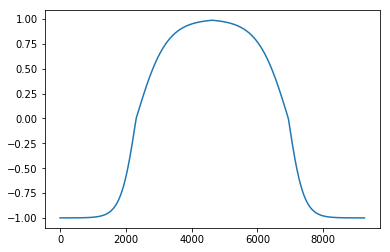

In [6]:
#FIRST REWARD AS A FUNCTION OF DRIFT OF BMEAN FROM BOPT i.e. in terms of BDEV = |BMEAN-BOPT|/BMAX
def r1(bmean): 
#     bmean = np.mean(self.btrack)
    BMAX = 9250
    BOPT = 0.5*BMAX
    bdev = np.abs(BOPT - bmean)/BMAX
    # based on the sigmoid function
    # bdev ranges from bdev = (0,0.5) of BMAX
    p1_sharpness = 10
    n1_sharpness = 20
    shift1 = 0.5
    # r1(x) = 0.5 when x = 0.25. 
    # Therefore, shift = 0.5 to make sure that (2*x-shift) evaluates to zero at x = 0.25

    if(bdev<=0.25): 
        r_1 = 2*(1-(1 / (1 + np.exp(-p1_sharpness*(2*bdev-shift1)))))-1
    else: 
        r_1 = 2*(1-(1 / (1 + np.exp(-n1_sharpness*(2*bdev-shift1)))))-1
    # r1 ranges from -1 to 1
    return r_1

x = np.arange(0,9250)
y = [r1(i) for i in x]
plt.plot(x,y)

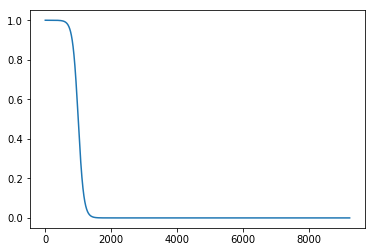

In [7]:
#SECOND REWARD AS A FUNCTION OF ENP AS LONG AS BMAX/4 <= batt <= 3*BMAX/4 i.e. bdev <= 0.25
def r2(enp):    # enp ranges from enp = (0,3) of DMAX
    DMAX = 500
    p2_sharpness = 2
    n2_sharpness = 2
    shift2 = 6    
    # r1(x) = 0.5 when x = 2. 
    # Therefore, shift = 6 to make sure that (3*x-shift) evaluates to zero at x = 2
#             print('Day energy', np.sum(self.eno.senergy[self.eno.day]))
#             print('Node energy', np.sum(self.atrack)*self.DMAX/self.N_ACTIONS)
#             x = np.abs(np.sum(self.eno.senergy[self.eno.day])-np.sum(self.atrack)*self.DMAX/self.N_ACTIONS )/self.DMAX
    x = np.abs(enp/DMAX)
    if(x<=2): 
        r_2 = (1 / (1 + np.exp(p2_sharpness*(3*x-shift2))))
    else: 
        r_2 = (1 / (1 + np.exp(n2_sharpness*(3*x-shift2))))
    return r_2

x = np.arange(0,9250)
y = [r2(i) for i in x]
plt.plot(x,y)

In [35]:
morning = np.arange(0,6)
night = np.arange(18,24)

In [41]:
index = np.concatenate((morning,night),axis=0)
print(index)

[ 0  1  2  3  4  5 18 19 20 21 22 23]


In [43]:
data = np.random.normal(size=24)
print(data)

[ 0.73384983 -0.30388092 -1.31282528 -0.46971375  0.68051533 -2.11823557
  0.3735134  -1.7729238  -0.058941    0.28267503  1.19886048 -0.85035064
  0.7437798   0.504626   -1.83081645  0.91448284 -2.34313918 -0.39155401
 -0.61510303  0.45877559 -1.07691698  0.16509869 -0.96996109  1.04962674]


In [44]:
data[index]

array([ 0.73384983, -0.30388092, -1.31282528, -0.46971375,  0.68051533,
       -2.11823557, -0.61510303,  0.45877559, -1.07691698,  0.16509869,
       -0.96996109,  1.04962674])